In [101]:
!pip install -q cartopy
!pip install -q copernicusmarine
!pip install -q cmocean

# **Importar Librerias**

In [102]:
import copernicusmarine
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.lines import Line2D
import cmocean as cmo
import pandas as pd
import seaborn as sns
from copy import deepcopy
from sklearn.cluster import DBSCAN
import requests
import os

# **Descargar datos de corrientes**

**Descarga Datos de Tormenta**

In [104]:
copernicusmarine.subset(
    dataset_id="cmems_obs-sl_glo_phy-ssh_nrt_allsat-l4-duacs-0.125deg_P1D",
    variables=["ugos", "vgos"],
    minimum_longitude=-85,
    maximum_longitude=-60,
    minimum_latitude=11,
    maximum_latitude=25,
    start_datetime="2025-10-18T00:00:00",
    end_datetime="2025-11-27T00:00:00",
    output_filename="Corrientes_tormenta.nc",
    force_download=True
)

WARNING - 2025-11-28T01:51:48Z - 'force_download' has been deprecated.
INFO - 2025-11-28T01:51:49Z - Downloading Copernicus Marine data requires a Copernicus Marine username and password, sign up for free at: https://data.marine.copernicus.eu/register
INFO:copernicusmarine:Downloading Copernicus Marine data requires a Copernicus Marine username and password, sign up for free at: https://data.marine.copernicus.eu/register


Copernicus Marine username: jmatos1
Copernicus Marine password: ··········


INFO - 2025-11-28T01:51:58Z - Selected dataset version: "202506"
INFO:copernicusmarine:Selected dataset version: "202506"
INFO - 2025-11-28T01:51:58Z - Selected dataset part: "default"
INFO:copernicusmarine:Selected dataset part: "default"
INFO - 2025-11-28T01:52:01Z - Starting download. Please wait...
INFO:copernicusmarine:Starting download. Please wait...
INFO - 2025-11-28T01:52:03Z - Successfully downloaded to Corrientes_tormenta_(2).nc
INFO:copernicusmarine:Successfully downloaded to Corrientes_tormenta_(2).nc


ResponseSubset(file_path=PosixPath('Corrientes_tormenta_(2).nc'), output_directory=PosixPath('.'), filename='Corrientes_tormenta_(2).nc', file_size=7.023687022900763, data_transfer_size=75.0412213740458, variables=['ugos', 'vgos'], coordinates_extent=[GeographicalExtent(minimum=-84.9375, maximum=-60.0625, unit='degrees_east', coordinate_id='longitude'), GeographicalExtent(minimum=11.0625, maximum=24.9375, unit='degrees_north', coordinate_id='latitude'), TimeExtent(minimum='2025-10-18T00:00:00+00:00', maximum='2025-11-27T00:00:00+00:00', unit='iso8601', coordinate_id='time')], status='000', message='The request was successful.', file_status='DOWNLOADED')

**Descarga datos temporada no ciclonica**

In [105]:
copernicusmarine.subset(
    dataset_id="cmems_obs-sl_glo_phy-ssh_nrt_allsat-l4-duacs-0.125deg_P1D",
    variables=["ugos", "vgos"],
    minimum_longitude=-85,
    maximum_longitude=-60,
    minimum_latitude=11,
    maximum_latitude=25,
    start_datetime="2025-01-18T00:00:00",
    end_datetime="2025-03-30T00:00:00",
    output_filename="Corrientes_sin_tormenta.nc",
    force_download=True
)

WARNING - 2025-11-28T01:52:03Z - 'force_download' has been deprecated.
INFO - 2025-11-28T01:52:04Z - Downloading Copernicus Marine data requires a Copernicus Marine username and password, sign up for free at: https://data.marine.copernicus.eu/register
INFO:copernicusmarine:Downloading Copernicus Marine data requires a Copernicus Marine username and password, sign up for free at: https://data.marine.copernicus.eu/register


Copernicus Marine username: jmatos1
Copernicus Marine password: ··········


INFO - 2025-11-28T01:52:13Z - Selected dataset version: "202506"
INFO:copernicusmarine:Selected dataset version: "202506"
INFO - 2025-11-28T01:52:13Z - Selected dataset part: "default"
INFO:copernicusmarine:Selected dataset part: "default"
INFO - 2025-11-28T01:52:15Z - Starting download. Please wait...
INFO:copernicusmarine:Starting download. Please wait...
INFO - 2025-11-28T01:52:18Z - Successfully downloaded to Corrientes_sin_tormenta_(1).nc
INFO:copernicusmarine:Successfully downloaded to Corrientes_sin_tormenta_(1).nc


ResponseSubset(file_path=PosixPath('Corrientes_sin_tormenta_(1).nc'), output_directory=PosixPath('.'), filename='Corrientes_sin_tormenta_(1).nc', file_size=12.324450381679389, data_transfer_size=75.0412213740458, variables=['ugos', 'vgos'], coordinates_extent=[GeographicalExtent(minimum=-84.9375, maximum=-60.0625, unit='degrees_east', coordinate_id='longitude'), GeographicalExtent(minimum=11.0625, maximum=24.9375, unit='degrees_north', coordinate_id='latitude'), TimeExtent(minimum='2025-01-18T00:00:00+00:00', maximum='2025-03-30T00:00:00+00:00', unit='iso8601', coordinate_id='time')], status='000', message='The request was successful.', file_status='DOWNLOADED')

# **Guardar Corrientes en un Diccionario**

In [106]:
corr_tormenta = xr.open_dataset("/content/Corrientes_tormenta.nc")
coor_normal = xr.open_dataset('/content/Corrientes_sin_tormenta.nc')

In [107]:
diccionario_nc = {
    "corriente_con_tormenta": {
        "data": corr_tormenta,
        "descripcion": "Corrientes oceánicas durante la tormenta"
    },
    "corriente_normal": {
        "data": coor_normal,
        "descripcion": "Corrientes oceánicas en periodo normal"
    }
}

# **CONFIGURACIÓN DE LAS PARTÍCULAS (SEMILLAS)**

**PUNTOS COSTEROS DE RD y PR**

In [108]:
puntos = [
    {
        "lat": 18.46,
        "lon": -69.88,
        "label": "Desembocadura del Río Ozama\n(Ciudad de Santo Domingo, RD)",
        "color": "black"
    },
    {
        "lat": 18.46,
        "lon": -69.30,
        "label": "Desembocadura del Río Soco\n(Ciudad de San Pedro de Macorís, RD)",
        "color": "darkorange"
    },
    {
        "lat": 19.71,
        "lon": -71.74,
        "label": "Desembocadura del Río Yaque del Norte\n(Ciudad de Santiago de los Caballeros, RD)",
        "color": "darkgreen"
    },
    {
        "lat": 18.19,
        "lon": -71.10,
        "label": "Desembocadura del Río Yaque del Sur\n(Barahona, RD)",
        "color": "purple"
    },
    {
        "lat": 18.58,
        "lon": -68.39,
        "label": "Punta Cana, RD",
        "color": "brown"
    },
    {
        "lat": 19.20,
        "lon": -69.20,
        "label": "Bahía de Samaná, RD",
        "color": "crimson"
    },
    {
        "lat": 18.45,
        "lon": -65.87,
        "label": "Río Grande de Loíza (Loíza, PR)",
        "color": "navy"
    },
    {
        "lat": 18.48,
        "lon": -66.25,
        "label": "Río de la Plata (Toa Baja, PR)",
        "color": "magenta"
    },
    {
        "lat": 18.49,
        "lon": -66.53,
        "label": "Río Grande de Manatí (Manatí, PR)",
        "color": "olive"
    },
    {
        "lat": 18.27,
        "lon": -67.20,
        "label": "Río Grande de Añasco (Añasco, PR)",
        "color": "darkslategray"
    }
]


**Lo agregamos al diccionario**

In [109]:
diccionario_nc["Puntos_contaminados_RD_y_PR"] = {
    "puntos_interes": puntos
}

**Generar las Semillas**

In [110]:
print("\n--- Generando Semillas de Inicio ---")
# N = número de partículas por punto
particulas_iniciales = []
N = 45
for p in puntos:
    for _ in range(N):
        # Crear puntos cercanos a los puntos costeros
        lat = p["lat"] + np.random.uniform(-0.15, 0.15)
        lon = p["lon"] + np.random.uniform(-0.15, 0.15)

        particulas_iniciales.append({
            "lat_history": [lat],
            "lon_history": [lon],
            "active": True,
            "label": p["label"],
            "color": p["color"]
        })
print("Partículas agregadas en zonas costeras:", len(puntos) * N)
print("Total de partículas:", len(particulas_iniciales))


--- Generando Semillas de Inicio ---
Partículas agregadas en zonas costeras: 450
Total de partículas: 450


# **Funcion**

In [111]:
def calcular_trayectorias(ds_curr, particulas_movidas):
    """
    Calcula la trayectoria de partículas usando un dataset de corrientes.

    Parámetros:
    -----------
    ds_curr : xarray.Dataset
        Dataset que contiene las corrientes 'ugos' y 'vgos'.
    particulas : list de dict
        Lista de partículas. Cada partícula debe tener:
            - 'active': bool
            - 'lat_history': lista de latitudes
            - 'lon_history': lista de longitudes
    dt_segundos : float
        Intervalo de tiempo entre pasos, en segundos. Por defecto 1 día.

    Devuelve:
    ---------
    particulas : list de dict
        La misma lista con las trayectorias actualizadas.
    """
    print("Calculando trayectorias...")

    times = ds_curr.time.values
    dt = 24 * 3600

    for t in times:
        # Cargar el slice de tiempo UNA sola vez por día para optimizar
        try:
            current_slice = ds_curr.sel(time=t)
        except KeyError:
            print(f"No hay datos para el tiempo {t}, terminando cálculo.")
            break

        todos_inactivos = True

        for p in particulas_movidas:
            if not p["active"]:
                continue

            todos_inactivos = False

            lat_actual = p["lat_history"][-1]
            lon_actual = p["lon_history"][-1]

            try:
                u = float(current_slice['ugos'].sel(latitude=lat_actual, longitude=lon_actual, method='nearest').values)
                v = float(current_slice['vgos'].sel(latitude=lat_actual, longitude=lon_actual, method='nearest').values)

                if np.isnan(u) or np.isnan(v):
                    p["active"] = False
                    continue

                dx = u * dt
                dy = v * dt

                d_lat = dy / 111132.0
                d_lon = dx / (111132.0 * np.cos(np.radians(lat_actual)))

                # Actualizar la posición
                p["lat_history"].append(lat_actual + d_lat)
                p["lon_history"].append(lon_actual + d_lon)

            except Exception:
                p["active"] = False
                continue

        if todos_inactivos:
            print(f"Todas las partículas salieron del dominio en {t}")
            break

    print("Cálculo listo")
    return particulas_movidas


**Funcion para Reiniciar el Estado**

In [112]:
def reiniciar_particulas(particulas):
    for p in particulas:
        p["active"] = True
        p["lat_history"] = [p["lat_history"][0]]
        p["lon_history"] = [p["lon_history"][0]]

# **Simulacion de la Deriva durante Tormenta**

**Copiamos las particulas para asegurarnos de que no se muevan a la hora de realizar el modelaje**

In [113]:
particulas_tormenta = deepcopy(particulas_iniciales)
particulas_sin_tormenta = deepcopy(particulas_iniciales)

**Subimos ambos datasets**

In [114]:
ds_curr = xr.open_dataset("/content/Corrientes_tormenta.nc")
ds_curr_sintor= xr.open_dataset('/content/Corrientes_sin_tormenta.nc')

In [115]:
trayectoria_tormenta= calcular_trayectorias(ds_curr, particulas_movidas= particulas_tormenta)

Calculando trayectorias...
Cálculo listo


**Agregamos las Particulas en Escenario de Tormenta al Diccionario**

In [116]:
diccionario_nc["corriente_con_tormenta"]["particulas"] = trayectoria_tormenta

# **Calculo con Corrientes normales**

In [117]:
reiniciar_particulas(particulas_sin_tormenta)

In [118]:
trayectoria_sin_tormenta= calcular_trayectorias(ds_curr_sintor, particulas_movidas= particulas_sin_tormenta)

Calculando trayectorias...
Cálculo listo


**Agregamos las Particulas en Escenario Normal al Diccionario**

In [119]:
diccionario_nc['corriente_normal']['particulas'] = trayectoria_sin_tormenta

# **Grafica usando particulas del Diccionario**

**Funcion para Grafica de Mapas**

In [120]:
def crear_mapa(titulo, escenario):
    """
    Creamos dos mapas a para comparar escenarios
    Titulo= al titulo que deseamos otorgarle al mapa
    Escenario = Escenario de tormenta o no tormenta.
    """
    plt.figure(figsize=(12, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([-85, -60, 11, 25], crs=ccrs.PlateCarree())

    # Mapa base
    ax.add_feature(cfeature.LAND, facecolor='lightgray', zorder=1)
    ax.add_feature(cfeature.COASTLINE, linewidth=1, zorder=2)
    ax.add_feature(cfeature.BORDERS, linestyle=':', zorder=2)
    ax.add_feature(cfeature.OCEAN, facecolor='dodgerblue')
    ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

    # Dibujar trayectorias
    for p in escenario:
        ax.plot(p["lon_history"], p["lat_history"],
                color=p["color"], linewidth=1.5, alpha=0.7,
                transform=ccrs.PlateCarree())

        ax.plot(p["lon_history"][0], p["lat_history"][0],
                marker='o', color='black', markersize=3,
                transform=ccrs.PlateCarree())

        ax.plot(p["lon_history"][-1], p["lat_history"][-1],
                marker='x', color=p["color"], markersize=5,
                transform=ccrs.PlateCarree())

    # Leyenda
    leyenda_puntos = [
        Line2D([0], [0], marker='o', color='w',
               label=p["label"],
               markerfacecolor=p["color"],
               markersize=8)
        for p in puntos
    ]

    ax.legend(
        handles=leyenda_puntos,
        loc='lower center',
        bbox_to_anchor=(0.5, -0.35),
        ncol=4,
        frameon=True,
        framealpha=0.9,
        edgecolor='black',
        facecolor='snow',
        title="Puntos de origen de partículas plásticas",
        prop={'weight': 'bold'},
        title_fontproperties={'weight': 'bold'}
    )

    plt.title(titulo, fontweight='bold', y=1.07)
    plt.show()

# **Fechas de los datos**

In [121]:
tiem_ciclonica = diccionario_nc['corriente_con_tormenta']['data']
tiemp_no_ciclonica = diccionario_nc['corriente_normal']['data']

In [122]:
tiempo_ciclonico_max= tiem_ciclonica.time.values.max()
tiempo_ciclonico_min= tiem_ciclonica.time.values.min()

t_max_fmt = pd.to_datetime(tiempo_ciclonico_max).strftime('%Y-%m-%d')
t_min_fmt = pd.to_datetime(tiempo_ciclonico_min).strftime('%Y-%m-%d')

print(f'el tiempo maximo de la temporada ciclonica es {t_max_fmt}')
print(f'el tiempo minimo de la temporada ciclonica es {t_min_fmt}')

el tiempo maximo de la temporada ciclonica es 2025-11-28
el tiempo minimo de la temporada ciclonica es 2025-10-18


In [123]:
tiempo_no_ciclonico_max= tiem_ciclonica.time.values.max()
tiempo_no_ciclonico_min= tiem_ciclonica.time.values.min()

t_max_fmt2 = pd.to_datetime(tiempo_no_ciclonico_max).strftime('%Y-%m-%d')
t_min_fmt2 = pd.to_datetime(tiempo_no_ciclonico_min).strftime('%Y-%m-%d')

print(f'el tiempo maximo de la temporada NO ciclonica es {t_max_fmt2}')
print(f'el tiempo minimo de la temporada NO ciclonica es {t_min_fmt2}')

el tiempo maximo de la temporada NO ciclonica es 2025-11-28
el tiempo minimo de la temporada NO ciclonica es 2025-10-18


# **Graficar mapas con escenarios**

**Con efecto de la tormenta**

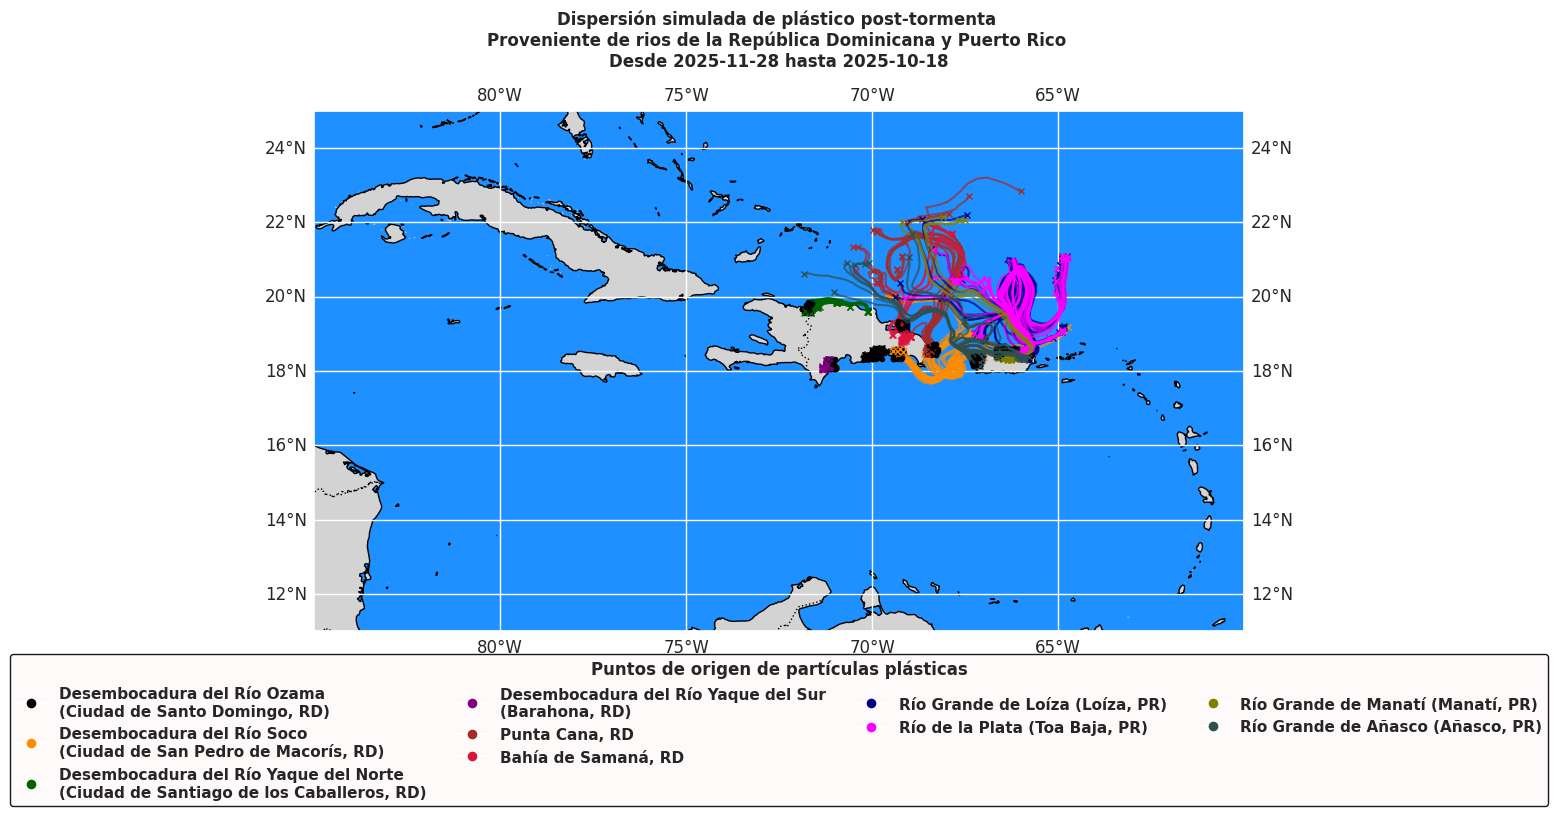

In [124]:
crear_mapa(f'Dispersión simulada de plástico post-tormenta \nProveniente de rios de la República Dominicana y Puerto Rico \nDesde {t_max_fmt} hasta {t_min_fmt}',
           escenario= diccionario_nc['corriente_con_tormenta']['particulas'])

**Mapa En Condiciones Normales**

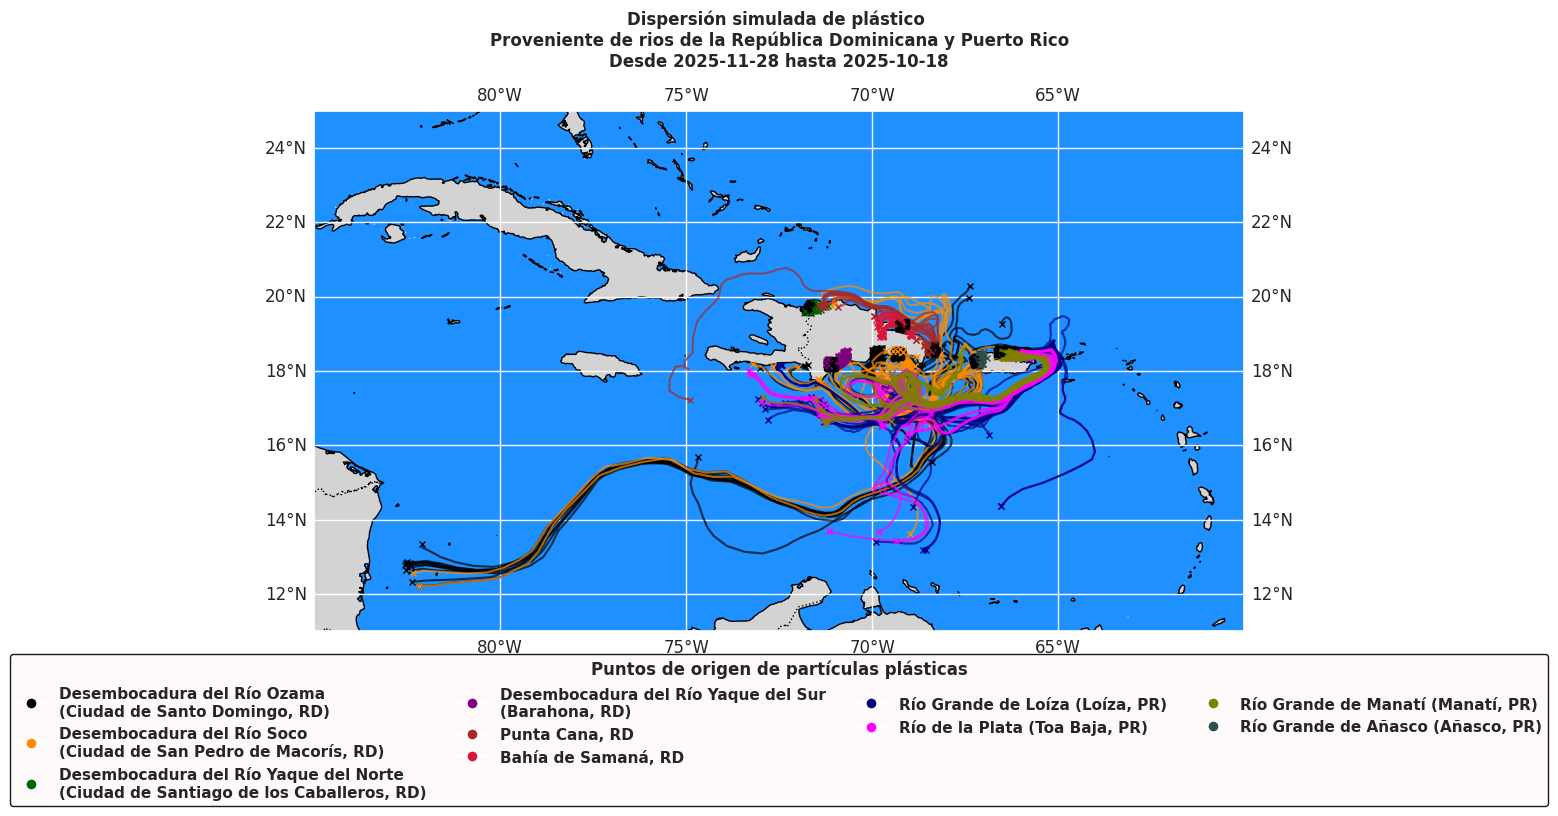

In [125]:
crear_mapa(f'Dispersión simulada de plástico \nProveniente de rios de la República Dominicana y Puerto Rico\nDesde {t_max_fmt2} hasta {t_min_fmt2}',
           escenario= diccionario_nc['corriente_normal']['particulas'])

# **Cantidad de Particulas que Llegan a Tiera**

**Funcion a Graficar**

In [126]:
def grafico_circulacion(titulo, dataset_corriente, particulas):

    data = dataset_corriente.mean(dim='time', keep_attrs=True)

    velo = np.sqrt(data.ugos**2 + data.vgos**2)

    fig, ax = plt.subplots(figsize=(12, 9),
                           subplot_kw={'projection': ccrs.PlateCarree()})

    ax.set_extent([-78, -60, 11, 22], crs=ccrs.PlateCarree())

    # ===== MAPA DE VELOCIDAD =====
    c = ax.pcolormesh(
        data.longitude,
        data.latitude,
        velo,
        transform=ccrs.PlateCarree(),
        cmap=cmo.cm.delta,
        vmin=0,
        vmax=0.7,
        zorder=0
    )

    cbar = plt.colorbar(c, ax=ax, pad=0.05, shrink=0.8)
    cbar.set_label('Velocidad de la corriente (m/s)')

    # ===== VECTORES =====
    skip = (slice(None, None, 3), slice(None, None, 3))

    q = ax.quiver(
        data.longitude[skip[1]],
        data.latitude[skip[0]],
        data.ugos[skip],
        data.vgos[skip],
        transform=ccrs.PlateCarree(),
        scale=5,
        width=0.002,
        color='white',
        zorder=10
    )

    ax.quiverkey(q, 0.9, 1.03, 0.2, '0.2 m/s',
                 labelpos='E', coordinates='axes')

    # ===== TRAYECTORIAS =====
    for p in particulas:
        ax.plot(p["lon_history"], p["lat_history"],
                color=p["color"], linewidth=1.5, alpha=0.7,
                transform=ccrs.PlateCarree())

        ax.plot(p["lon_history"][0], p["lat_history"][0],
                marker='o', color='black', markersize=3,
                transform=ccrs.PlateCarree())

        ax.plot(p["lon_history"][-1], p["lat_history"][-1],
                marker='x', color=p["color"], markersize=5,
                transform=ccrs.PlateCarree())

    # ===== LEYENDA =====
    leyenda_puntos = [
        Line2D([0], [0], marker='o', color='w',
               label=p["label"],
               markerfacecolor=p["color"],
               markersize=8)
        for p in puntos
    ]

    ax.legend(
        handles=leyenda_puntos,
        loc='lower center',
        bbox_to_anchor=(0.5, -0.4),
        ncol=4,
        frameon=True,
        framealpha=0.9,
        edgecolor='black',
        facecolor='snow',
        prop={'weight': 'bold'}
    )

    ax.add_feature(cfeature.LAND, facecolor='gray', zorder=5)
    ax.add_feature(cfeature.COASTLINE, zorder=6)

    gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=0.5)
    gl.top_labels = True
    gl.bottom_labels = False
    gl.left_labels = True
    gl.right_labels = False

    ax.set_title(titulo, fontweight='bold', y=1.05)

    plt.show()


In [127]:
corr_tormenta = xr.open_dataset("/content/Corrientes_tormenta.nc")
coor_normal = xr.open_dataset('/content/Corrientes_sin_tormenta.nc')

**Temporada Ciclonica**

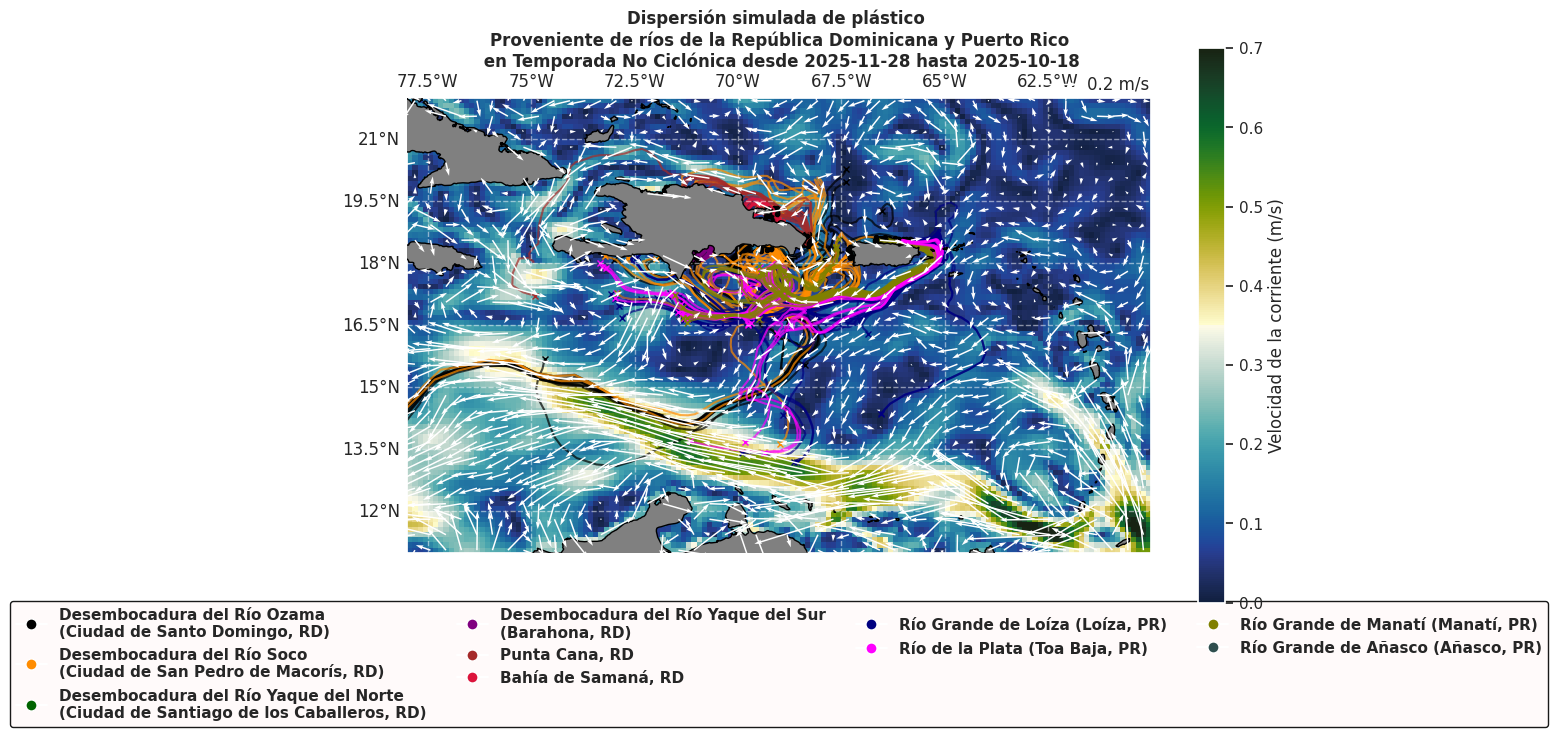

In [128]:
grafico_circulacion(
    f'Dispersión simulada de plástico \nProveniente de ríos de la República Dominicana y Puerto Rico\n en Temporada No Ciclónica desde {t_max_fmt2} hasta {t_min_fmt2}',
    dataset_corriente=coor_normal,
    particulas=diccionario_nc['corriente_normal']['particulas']
)

**Temporada No Ciclonica**

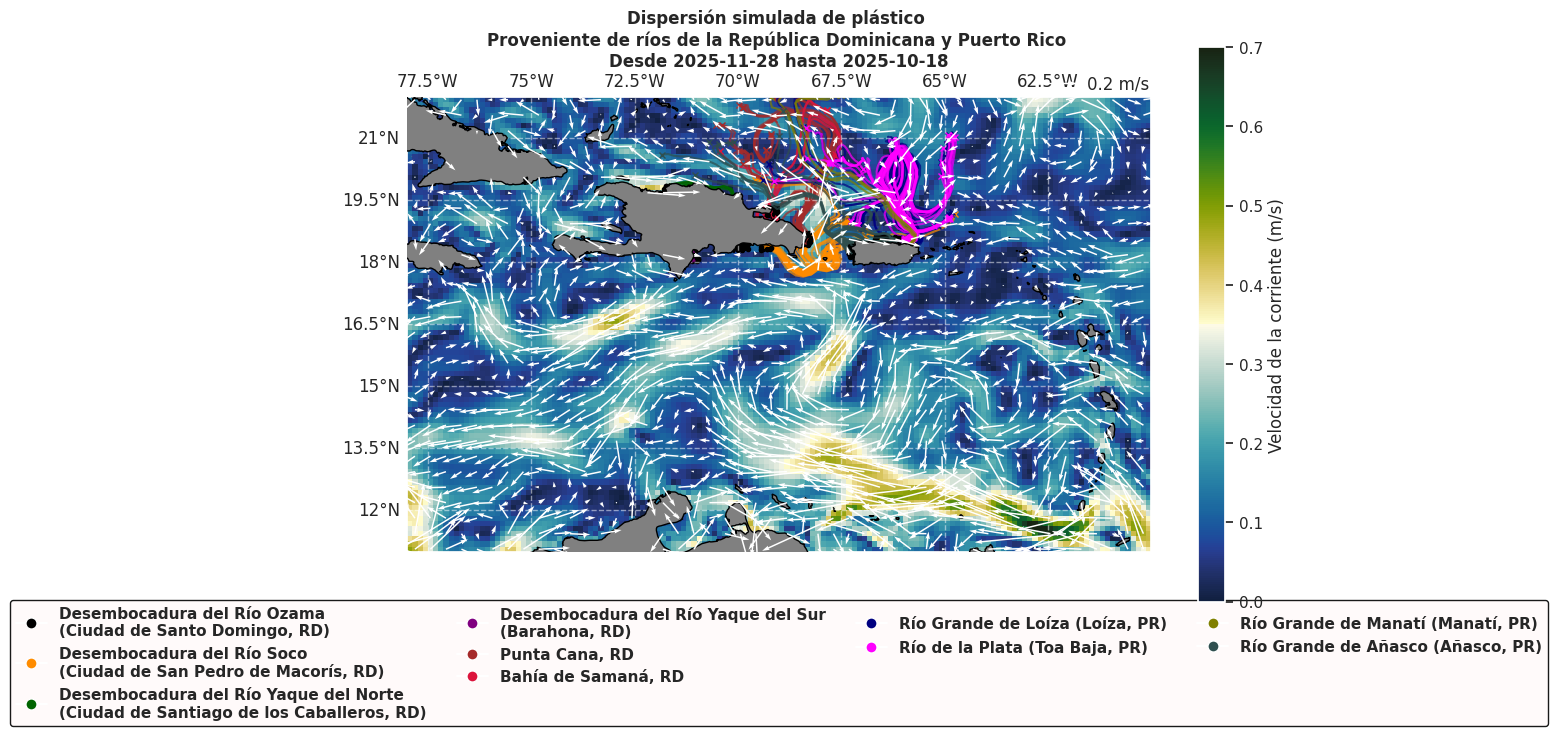

In [129]:
grafico_circulacion(
    f'Dispersión simulada de plástico \nProveniente de ríos de la República Dominicana y Puerto Rico \nDesde {t_max_fmt2} hasta {t_min_fmt2}',
    dataset_corriente=corr_tormenta,
    particulas=diccionario_nc['corriente_con_tormenta']['particulas']
)

# **Cantidad de Particulas que Llegan a Tiera**

Total de partículas: 450
Partículas que llegaron a tierra 328
Partículas que siguen en el mar: 122


/tmp/ipython-input-637870452.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Categoría', y='Cantidad', data=df_particulas,


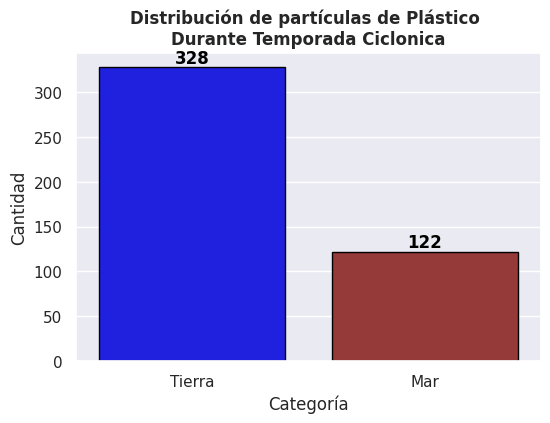

In [130]:
particulas= diccionario_nc['corriente_con_tormenta']['particulas']
total = len(particulas)
inactivas = sum(not p["active"] for p in particulas)
activas = sum(p["active"] for p in particulas)

print(f"Total de partículas: {total}")
print(f"Partículas que llegaron a tierra {inactivas}")
print(f"Partículas que siguen en el mar: {activas}")

df_particulas = pd.DataFrame({
    'Categoría': ['Tierra', 'Mar'],
    'Cantidad': [inactivas, activas]
})

sns.set_theme(style='darkgrid')
colors= ['blue', 'brown']
# Gráfico de barras
plt.figure(figsize=(6,4))
ax = sns.barplot(x='Categoría', y='Cantidad', data=df_particulas,
                 palette= colors, edgecolor= 'black')

# Añadir etiquetas encima de las barras
for i, v in enumerate(df_particulas['Cantidad']):
    ax.text(i, v + 5, str(v), color='black', ha='center', fontweight='bold')

plt.title('Distribución de partículas de Plástico \nDurante Temporada Ciclonica', fontweight= 'bold')
plt.show()

**Temporada Ciclonica**

Total de partículas: 450
Partículas que llegaron a tierra 326
Partículas que siguen en el mar: 124


/tmp/ipython-input-1106251599.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Categoría', y='Cantidad', data=df_particulas,


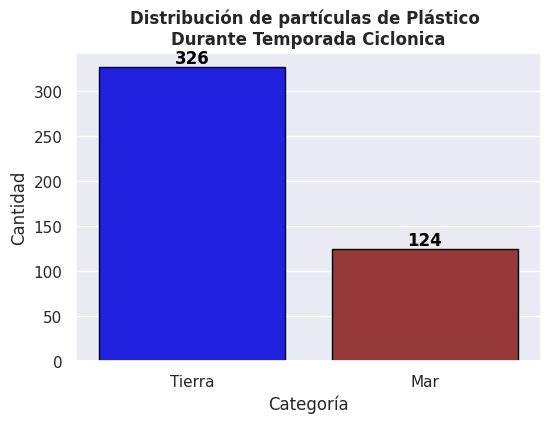

In [131]:
particulas= diccionario_nc['corriente_normal']['particulas']
total = len(particulas)
inactivas = sum(not p["active"] for p in particulas)
activas = sum(p["active"] for p in particulas)

print(f"Total de partículas: {total}")
print(f"Partículas que llegaron a tierra {inactivas}")
print(f"Partículas que siguen en el mar: {activas}")

df_particulas = pd.DataFrame({
    'Categoría': ['Tierra', 'Mar'],
    'Cantidad': [inactivas, activas]
})

sns.set_theme(style='darkgrid')
colors= ['blue', 'brown']
# Gráfico de barras
plt.figure(figsize=(6,4))
ax = sns.barplot(x='Categoría', y='Cantidad', data=df_particulas,
                 palette= colors, edgecolor= 'black')

# Añadir etiquetas encima de las barras
for i, v in enumerate(df_particulas['Cantidad']):
    ax.text(i, v + 5, str(v), color='black', ha='center', fontweight='bold')

plt.title('Distribución de partículas de Plástico \nDurante Temporada Ciclonica', fontweight= 'bold')
plt.show()

# **Extender el area**

In [132]:
# ---------------------------------------------------------
# 1. DESCARGA DE DATOS (Actualizada con margen extra)
# ---------------------------------------------------------
print("Verificando archivos de datos...")
try:
    # Altura de ola (Misma config)
    copernicusmarine.subset(
        dataset_id="cmems_mod_glo_wav_anfc_0.083deg_PT3H-i",
        variables=["VHM0"],
        minimum_longitude=-85, maximum_longitude=-60, # Ampliado a -73
        minimum_latitude=11, maximum_latitude=25,     # Ampliado un poco al norte (21)
        start_datetime="2025-08-15T21:00:00",
        end_datetime="2025-08-22T21:00:00",
        output_filename="AlturaOlaEx.nc",
        force_download=True
    )

    # Corrientes (Dato diario P1D)
    copernicusmarine.subset(
        dataset_id="cmems_obs-sl_glo_phy-ssh_nrt_allsat-l4-duacs-0.125deg_P1D",
        variables=["ugos", "vgos"],
        minimum_longitude=-85, maximum_longitude=-60, # Ampliado a -73
        minimum_latitude=11, maximum_latitude=25,
        start_datetime="2025-08-15T00:00:00",
        end_datetime="2025-11-22T00:00:00",
        output_filename="CorrientesEx.nc",
        force_download=True
    )
    print("Datos listos.")
except Exception as e:
    print(f"Nota sobre descarga: {e}")

print("Descarga completada (o archivos ya existentes).")

WARNING - 2025-11-28T01:54:23Z - 'force_download' has been deprecated.


Verificando archivos de datos...


INFO - 2025-11-28T01:54:23Z - Downloading Copernicus Marine data requires a Copernicus Marine username and password, sign up for free at: https://data.marine.copernicus.eu/register
INFO:copernicusmarine:Downloading Copernicus Marine data requires a Copernicus Marine username and password, sign up for free at: https://data.marine.copernicus.eu/register


Copernicus Marine username: jmatos1
Copernicus Marine password: ··········


INFO - 2025-11-28T01:54:33Z - Selected dataset version: "202411"
INFO:copernicusmarine:Selected dataset version: "202411"
INFO - 2025-11-28T01:54:33Z - Selected dataset part: "default"
INFO:copernicusmarine:Selected dataset part: "default"
INFO - 2025-11-28T01:54:35Z - Starting download. Please wait...
INFO:copernicusmarine:Starting download. Please wait...


  0%|          | 0/21 [00:00<?, ?it/s]

INFO - 2025-11-28T01:54:40Z - Successfully downloaded to AlturaOlaEx_(1).nc
INFO:copernicusmarine:Successfully downloaded to AlturaOlaEx_(1).nc
WARNING - 2025-11-28T01:54:40Z - 'force_download' has been deprecated.
INFO - 2025-11-28T01:54:41Z - Downloading Copernicus Marine data requires a Copernicus Marine username and password, sign up for free at: https://data.marine.copernicus.eu/register
INFO:copernicusmarine:Downloading Copernicus Marine data requires a Copernicus Marine username and password, sign up for free at: https://data.marine.copernicus.eu/register


Copernicus Marine username: jmatos1
Copernicus Marine password: ··········


INFO - 2025-11-28T01:55:01Z - Selected dataset version: "202506"
INFO:copernicusmarine:Selected dataset version: "202506"
INFO - 2025-11-28T01:55:01Z - Selected dataset part: "default"
INFO:copernicusmarine:Selected dataset part: "default"
INFO - 2025-11-28T01:55:03Z - Starting download. Please wait...
INFO:copernicusmarine:Starting download. Please wait...


  0%|          | 0/20 [00:00<?, ?it/s]

INFO - 2025-11-28T01:55:08Z - Successfully downloaded to CorrientesEx_(1).nc
INFO:copernicusmarine:Successfully downloaded to CorrientesEx_(1).nc


Datos listos.
Descarga completada (o archivos ya existentes).


# **FUNCIÓN DE DESCARGA ROBUSTA (Chunked Download)**

In [133]:
# ---------------------------------------------------------
# 5. FUNCIÓN DE DESCARGA ROBUSTA (Chunked Download)
# ---------------------------------------------------------
def descargar_mdt_seguro(filename="MDT_Caribe_Riesgo.nc"):
    print(f"Iniciando descarga segura de: {filename}")
    # URL corregida y simplificada del servidor NOAA ERDDAP
    # Solicitamos ETOPO1 (Bedrock), recortado a tu zona exacta
    url = "https://coastwatch.pfeg.noaa.gov/erddap/griddap/etopo180.nc?altitude[(10):1:(26)][(-85):1:(-59)]"

    try:
        with requests.get(url, stream=True) as r:
            r.raise_for_status()
            total_size = int(r.headers.get('content-length', 0))
            downloaded = 0

            with open(filename, 'wb') as f:
                for chunk in r.iter_content(chunk_size=8192):
                    f.write(chunk)
                    downloaded += len(chunk)
                    # Barra de progreso simple
                    if total_size > 0:
                        percent = (downloaded / total_size) * 100
                        print(f"Descargando: {percent:.1f}%", end='\r')

        print(f"\n¡Descarga completada! Guardado en {filename}")
        return True
    except Exception as e:
        print(f"\nError fatal en descarga: {e}")
        return False

# Ejecutar descarga si no existe el archivo
import os
if not os.path.exists("MDT_Caribe_Riesgo.nc"):
    exito = descargar_mdt_seguro()
else:
    print("El archivo MDT ya existe. Saltando descarga.")
    exito = True

El archivo MDT ya existe. Saltando descarga.


# **Identificación de ola max de tormenta y zonas de riesgo para el area de interes**

/tmp/ipython-input-4392348.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  storm_height = float(storm_point.values[0])


Cargando datos y buscando la tormenta...
📍 TORMENTA DETECTADA:
   📅 Fecha: 2025-08-19 06:00:00
   🌍 Ubicación: 24.833 N, -71.500 W
   🌊 Altura Ola Pico: 15.93 metros

Simulando desplazamiento de la marejada...

⚠️ ¡ALERTA! Se detectaron impactos en 4 zonas costeras.
   Nivel de agua estimado para inundación: 4.83 m


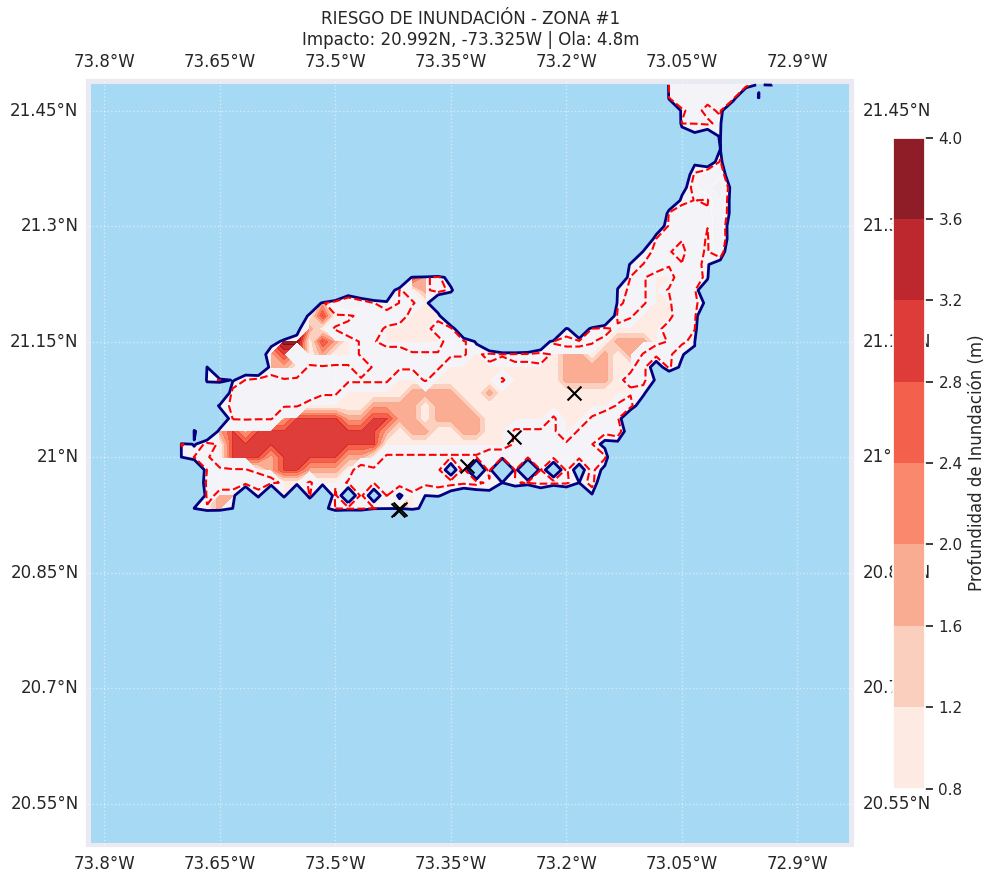

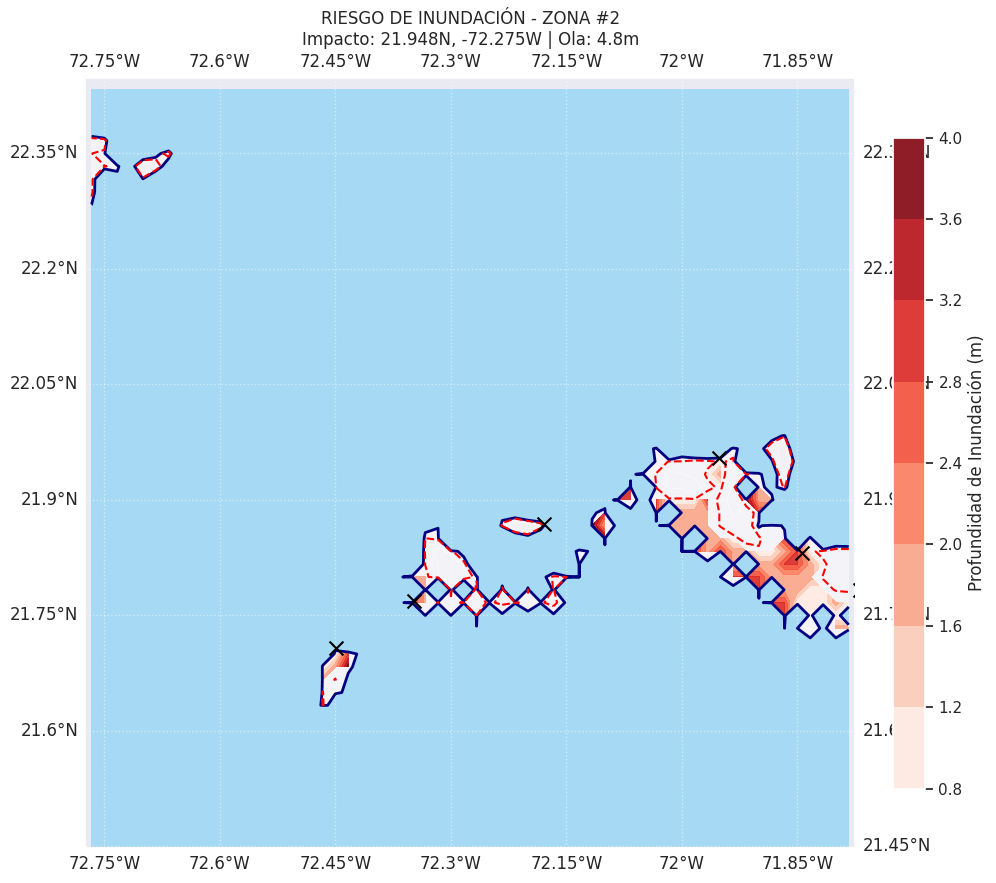

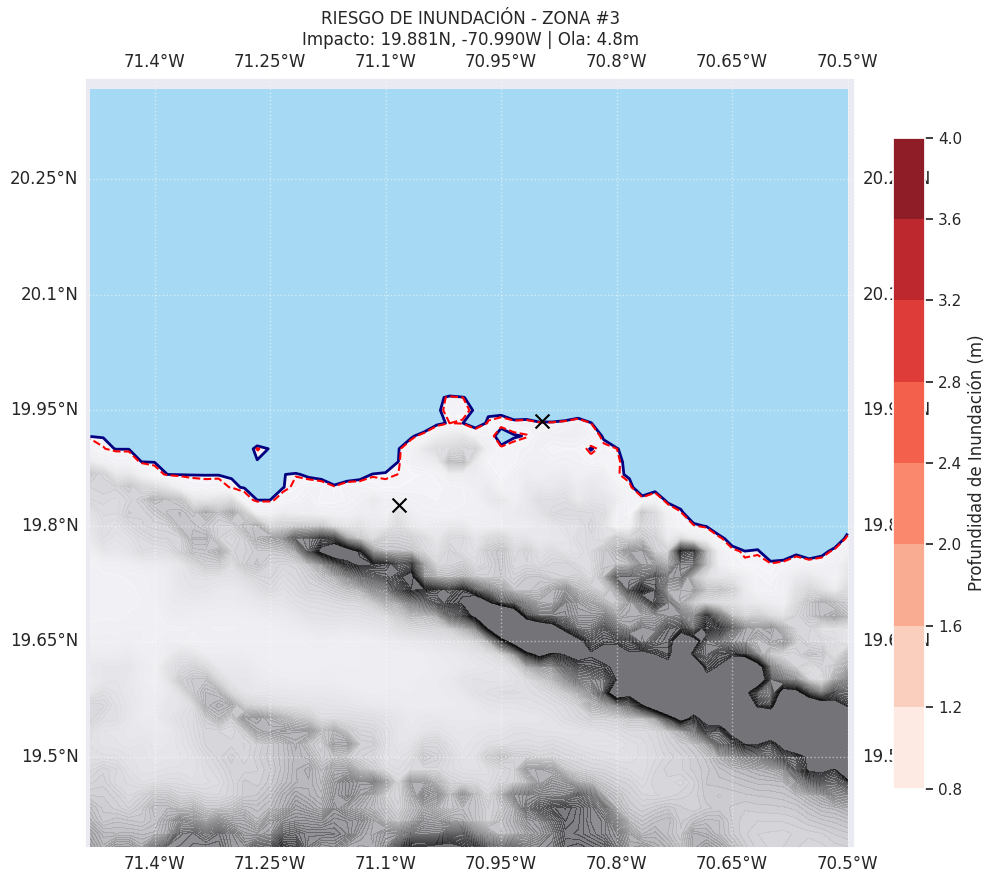

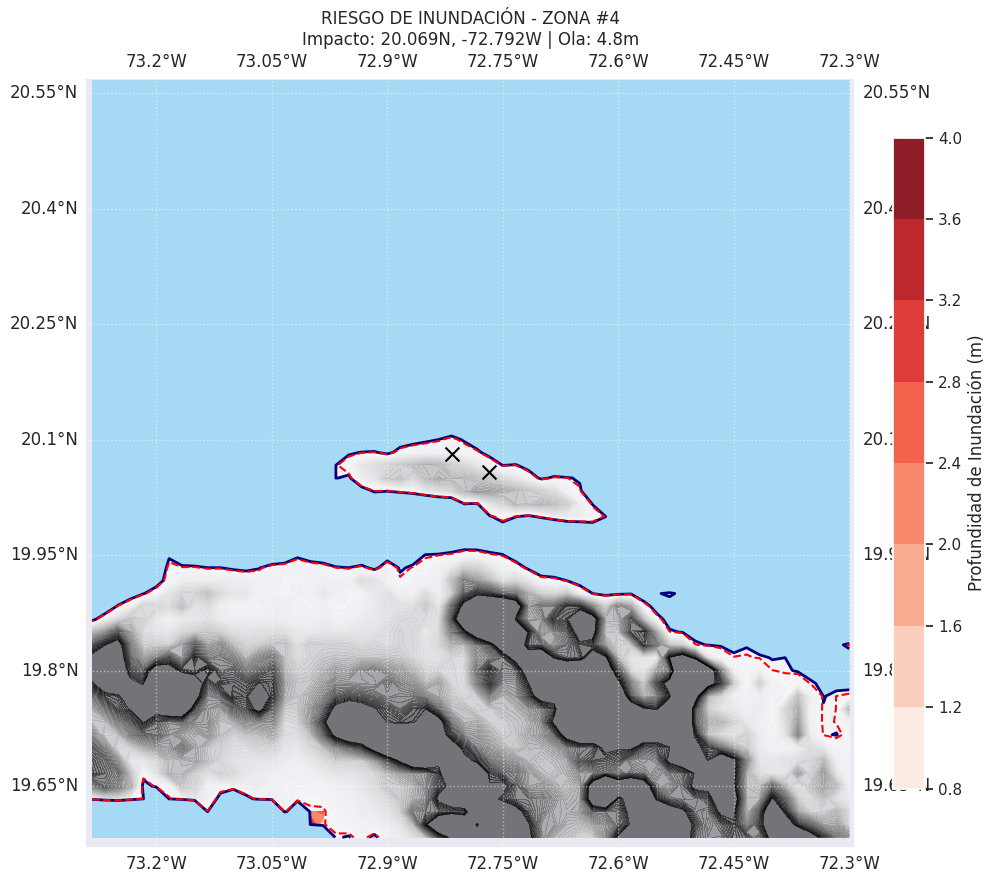

In [134]:
# --- 2. CARGA DE DATOS Y DETECCIÓN DE TORMENTA ---
print("Cargando datos y buscando la tormenta...")
ds_waves = xr.open_dataset("AlturaOlaEx.nc")
ds_curr = xr.open_dataset("/content/CorrientesEx.nc")
ds_mdt = xr.open_dataset("MDT_Caribe_Riesgo.nc")

# Encontrar el máximo histórico
vhm0 = ds_waves['VHM0']
max_val = vhm0.max()
storm_point = vhm0.where(vhm0 == max_val, drop=True)

storm_time = storm_point.time.values[0]
storm_lat = float(storm_point.latitude.values[0])
storm_lon = float(storm_point.longitude.values[0])
storm_height = float(storm_point.values[0])

print(f"📍 TORMENTA DETECTADA:")
print(f"   📅 Fecha: {pd.to_datetime(storm_time)}")
print(f"   🌍 Ubicación: {storm_lat:.3f} N, {storm_lon:.3f} W")
print(f"   🌊 Altura Ola Pico: {storm_height:.2f} metros")

# --- 3. SIMULACIÓN DE TRAYECTORIA ---
print("\nSimulando desplazamiento de la marejada...")
particulas = []
radio_dispersion = 0.5

for i in range(50):
    lat_r = storm_lat + np.random.uniform(-radio_dispersion, radio_dispersion)
    lon_r = storm_lon + np.random.uniform(-radio_dispersion, radio_dispersion)
    particulas.append({
        "lat": [lat_r], "lon": [lon_r], "active": True, "impacto": False
    })

times_sim = ds_curr.time.sel(time=slice(storm_time, None)).values
dt = 24 * 3600

for t in times_sim:
    try:
        curr_slice = ds_curr.sel(time=t, method='nearest')
    except: continue

    todos_inactivos = True
    for p in particulas:
        if not p["active"]: continue
        todos_inactivos = False

        lat, lon = p["lat"][-1], p["lon"][-1]

        try:
            elev = float(ds_mdt['altitude'].sel(latitude=lat, longitude=lon, method='nearest').values)
            if elev > 0:
                p["active"] = False
                p["impacto"] = True
                continue
        except: pass

        try:
            u = float(curr_slice['ugos'].sel(latitude=lat, longitude=lon, method='nearest').values)
            v = float(curr_slice['vgos'].sel(latitude=lat, longitude=lon, method='nearest').values)
            if np.isnan(u):
                p["active"] = False
                continue
            p["lat"].append(lat + (v * dt / 111132.0))
            p["lon"].append(lon + (u * dt / (111132.0 * np.cos(np.radians(lat)))))
        except: p["active"] = False

    if todos_inactivos: break

# --- 4. ANÁLISIS DE IMPACTO CON ZOOM (MEJORADO VISUALMENTE) ---
impactos = np.array([[p["lon"][-1], p["lat"][-1]] for p in particulas if p["impacto"]])

if len(impactos) > 0:
    clustering = DBSCAN(eps=0.8, min_samples=1).fit(impactos)
    labels = clustering.labels_
    unique_labels = set(labels)
    if -1 in unique_labels: unique_labels.remove(-1)

    print(f"\n⚠️ ¡ALERTA! Se detectaron impactos en {len(unique_labels)} zonas costeras.")

    cota_inundacion = storm_height * 0.3 + 0.05
    print(f"   Nivel de agua estimado para inundación: {cota_inundacion:.2f} m")

    for label_id in unique_labels:
        puntos_zona = impactos[labels == label_id]
        c_lon = np.mean(puntos_zona[:, 0])
        c_lat = np.mean(puntos_zona[:, 1])

        # Zoom de 0.5 grados
        zoom = 0.5
        lat_min, lat_max = c_lat - zoom, c_lat + zoom
        lon_min, lon_max = c_lon - zoom, c_lon + zoom

        lat_slice = sorted([lat_min, lat_max])
        lon_slice = sorted([lon_min, lon_max])

        subset = ds_mdt.sel(latitude=slice(lat_slice[0], lat_slice[1]),
                            longitude=slice(lon_slice[0], lon_slice[1]))

        if subset['altitude'].size == 0: continue

        elev = subset['altitude']
        mask_flood = (elev > 0) & (elev < cota_inundacion)
        profundidad = (cota_inundacion - elev).where(mask_flood)

        # --- GRAFICAR ZOOM (CORREGIDO - TIERRA FIRME) ---
        fig = plt.figure(figsize=(12, 10))
        ax = plt.axes(projection=ccrs.PlateCarree())
        ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

        # 1. Pintar explícitamente el MAR (z <= 0) de Azul
        # Usamos contourf con un solo nivel para "rellenar" todo lo que sea mar
        ax.contourf(subset.longitude, subset.latitude, elev,
                    levels=[-10000, 0], colors=['#a6d9f3'], zorder=1)

        # 2. Pintar TIERRA SEGURA (z > 0) de Gris
        # Importante: Empezamos en 0.01 para cubrir toda la tierra positiva
        ax.contourf(subset.longitude, subset.latitude, elev,
                    levels=np.arange(0, 500, 10), cmap='Greys', alpha=0.5, zorder=2, extend='max')

        # 3. Pintar INUNDACIÓN (Rojo sobre la tierra)
        if np.any(mask_flood):
            flood_plot = ax.contourf(subset.longitude, subset.latitude, profundidad,
                                     cmap='Reds', alpha=0.9, zorder=5)
            # Barra de profundidad más pequeña y limpia
            cbar = plt.colorbar(flood_plot, ax=ax, label="Profundidad de Inundación (m)", fraction=0.035, pad=0.04)

        # 4. Líneas de referencia (Contornos)
        # Costa (Nivel 0 exacto) en Azul Oscuro
        ax.contour(subset.longitude, subset.latitude, elev, levels=[0],
                   colors='navy', linewidths=2, zorder=6)

        # Límite de Inundación (Cota Máxima) en Rojo
        ax.contour(subset.longitude, subset.latitude, elev, levels=[cota_inundacion],
                   colors='red', linestyles='--', linewidths=1.5, zorder=6)

        # 5. Puntos de impacto
        ax.scatter(puntos_zona[:,0], puntos_zona[:,1], c='black', marker='x', s=100, label='Impacto Ola', zorder=10)

        # Decoración
        ax.gridlines(draw_labels=True, linestyle=':', alpha=0.5)
        plt.title(f"RIESGO DE INUNDACIÓN - ZONA #{label_id+1}\nImpacto: {c_lat:.3f}N, {c_lon:.3f}W | Ola: {cota_inundacion:.1f}m")
        plt.show()
else:
    print("La tormenta se disipó en el mar sin tocar tierra.")